In [1]:
import numpy as np
np.__version__

'1.21.0'

In [2]:
import pandas as pd
pd.__version__

'1.2.4'

In [3]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [6]:
default_max_columns=pd.get_option('display.max_columns')

In [7]:
default_max_rows=pd.get_option('display.max_rows')

In [8]:
default_precision=pd.get_option('display.precision')

In [9]:
pd.set_option('display.precision', 2)

In [10]:
#default_threshold=np.get_printoptions()['threshold']

In [11]:
#np.set_printoptions(threshold=10000000)

# Read Metadata 1

In [12]:
mt1=pd.read_csv("TCGA/metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['subject','sample','days_to_death','gender1','disease_type','center_name','Unknown'])
mt1['sample']=mt1['sample'].str[0:20]

In [13]:
mt1.shape

(278, 7)

In [14]:
mt1

,subject,sample,days_to_death,gender1,disease_type,center_name,Unknown
0,02-2483,02-2483-01A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
1,02-2483,02-2483-10A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
2,02-2485,02-2485-01A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
3,02-2485,02-2485-10A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
4,06-0125,06-0125-01A-01D-1490,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
...,...,...,...,...,...,...,...
273,TQ-A7RV,TQ-A7RV-02A-11D-A36O,NaN,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9382/3
274,TQ-A7RV,TQ-A7RV-10A-01D-A34A,NaN,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9382/3
275,TQ-A8XE,TQ-A8XE-01A-11D-A36O,954.0,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9450/3
276,TQ-A8XE,TQ-A8XE-02A-11D-A36O,954.0,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9450/3


In [15]:
mt1.drop(['subject','days_to_death','gender1','center_name','Unknown'],axis='columns',inplace=True)

# NORMALIZE INSERTION POINTS BY ( * 1,000,000,000 / READ COUNT )

In [16]:
tcga_counts=pd.read_csv('TCGA/sequencing_paired_read_counts.csv',header=None,names=['sample','raw pair count'])
tcga_counts

,sample,raw pair count
0,02-2483-01A-01D-1494,566024474
1,02-2483-10A-01D-1494,579304076
2,02-2485-01A-01D-1494,575060540
3,02-2485-10A-01D-1494,478851061
4,06-0125-01A-01D-1490,1066268796
...,...,...
273,TQ-A7RV-02A-11D-A36O,697454066
274,TQ-A7RV-10A-01D-A34A,362586651
275,TQ-A8XE-01A-11D-A36O,724443745
276,TQ-A8XE-02A-11D-A36O,628610301


In [17]:
tcga_counts['type']=tcga_counts['sample'].str[8:10]
tcga_counts

,sample,raw pair count,type
0,02-2483-01A-01D-1494,566024474,01
1,02-2483-10A-01D-1494,579304076,10
2,02-2485-01A-01D-1494,575060540,01
3,02-2485-10A-01D-1494,478851061,10
4,06-0125-01A-01D-1490,1066268796,01
...,...,...,...
273,TQ-A7RV-02A-11D-A36O,697454066,02
274,TQ-A7RV-10A-01D-A34A,362586651,10
275,TQ-A8XE-01A-11D-A36O,724443745,01
276,TQ-A8XE-02A-11D-A36O,628610301,02


In [18]:
tcga_counts=tcga_counts[tcga_counts['type']=='10']
tcga_counts

,sample,raw pair count,type
1,02-2483-10A-01D-1494,579304076,10
3,02-2485-10A-01D-1494,478851061,10
6,06-0125-10A-01D-1490,695377506,10
9,06-0157-10A-01D-1491,561676819,10
12,06-0171-10A-01D-A33C,721570484,10
...,...,...,...
264,IK-7675-10A-01D-2086,534278319,10
267,TM-A7CF-10A-01D-A329,350269398,10
271,TQ-A7RK-10A-01D-A33W,372900517,10
274,TQ-A7RV-10A-01D-A34A,362586651,10


In [19]:
tcga_counts=tcga_counts.merge(mt1,on='sample')
tcga_counts

,sample,raw pair count,type,disease_type
0,02-2483-10A-01D-1494,579304076,10,Glioblastoma Multiforme
1,02-2485-10A-01D-1494,478851061,10,Glioblastoma Multiforme
2,06-0125-10A-01D-1490,695377506,10,Glioblastoma Multiforme
3,06-0157-10A-01D-1491,561676819,10,Glioblastoma Multiforme
4,06-0171-10A-01D-A33C,721570484,10,Glioblastoma Multiforme
...,...,...,...,...
120,IK-7675-10A-01D-2086,534278319,10,Brain Lower Grade Glioma
121,TM-A7CF-10A-01D-A329,350269398,10,Brain Lower Grade Glioma
122,TQ-A7RK-10A-01D-A33W,372900517,10,Brain Lower Grade Glioma
123,TQ-A7RV-10A-01D-A34A,362586651,10,Brain Lower Grade Glioma


In [20]:
gpmp_counts=pd.read_csv("GPMP/raw_read_counts.csv")
gpmp_counts['disease_type']='GBM'
gpmp_counts

,sample,raw pair count,disease_type
0,SF12149_S1L0_E,1515318278,GBM
1,SF12149_S1L1_N,660620929,GBM
2,SF12149_S2L0_NE,1334986480,GBM
3,SF12210_S2L1_N,597544666,GBM
4,SF12210_S3L1_E,1487133148,GBM
...,...,...,...
59,SF12634_S10L4_N,1403120096,GBM
60,SF12634_S13L4_E,1528226977,GBM
61,SF12634_S14L4_NE,1075444460,GBM
62,SF12656_S11L4_N,1320466667,GBM


In [21]:
gpmp_counts['type']=gpmp_counts['sample'].str[-1]
gpmp_counts

,sample,raw pair count,disease_type,type
0,SF12149_S1L0_E,1515318278,GBM,E
1,SF12149_S1L1_N,660620929,GBM,N
2,SF12149_S2L0_NE,1334986480,GBM,E
3,SF12210_S2L1_N,597544666,GBM,N
4,SF12210_S3L1_E,1487133148,GBM,E
...,...,...,...,...
59,SF12634_S10L4_N,1403120096,GBM,N
60,SF12634_S13L4_E,1528226977,GBM,E
61,SF12634_S14L4_NE,1075444460,GBM,E
62,SF12656_S11L4_N,1320466667,GBM,N


In [22]:
gpmp_counts=gpmp_counts[gpmp_counts['type']=='N']
gpmp_counts

,sample,raw pair count,disease_type,type
1,SF12149_S1L1_N,660620929,GBM,N
3,SF12210_S2L1_N,597544666,GBM,N
8,SF12255_S7L2_N,688035696,GBM,N
11,SF12271_S8L2_N,751091228,GBM,N
13,SF12288_S1L1_N,1101793738,GBM,N
21,SF12333_S2L1_N,1195944225,GBM,N
30,SF12407_S1L1_N,1176493990,GBM,N
39,SF12430_S2L1_N,1267959047,GBM,N
50,SF12460_S8L3_N,960343467,GBM,N
53,SF12480_S7L3_N,887718652,GBM,N


In [23]:
counts=tcga_counts.append(gpmp_counts)

In [24]:
counts

,sample,raw pair count,type,disease_type
0,02-2483-10A-01D-1494,579304076,10,Glioblastoma Multiforme
1,02-2485-10A-01D-1494,478851061,10,Glioblastoma Multiforme
2,06-0125-10A-01D-1490,695377506,10,Glioblastoma Multiforme
3,06-0157-10A-01D-1491,561676819,10,Glioblastoma Multiforme
4,06-0171-10A-01D-A33C,721570484,10,Glioblastoma Multiforme
...,...,...,...,...
53,SF12480_S7L3_N,887718652,N,GBM
56,SF12495_S9L3_N,1040215160,N,GBM
58,SF12577_S6L2_N,1391591783,N,GBM
59,SF12634_S10L4_N,1403120096,N,GBM


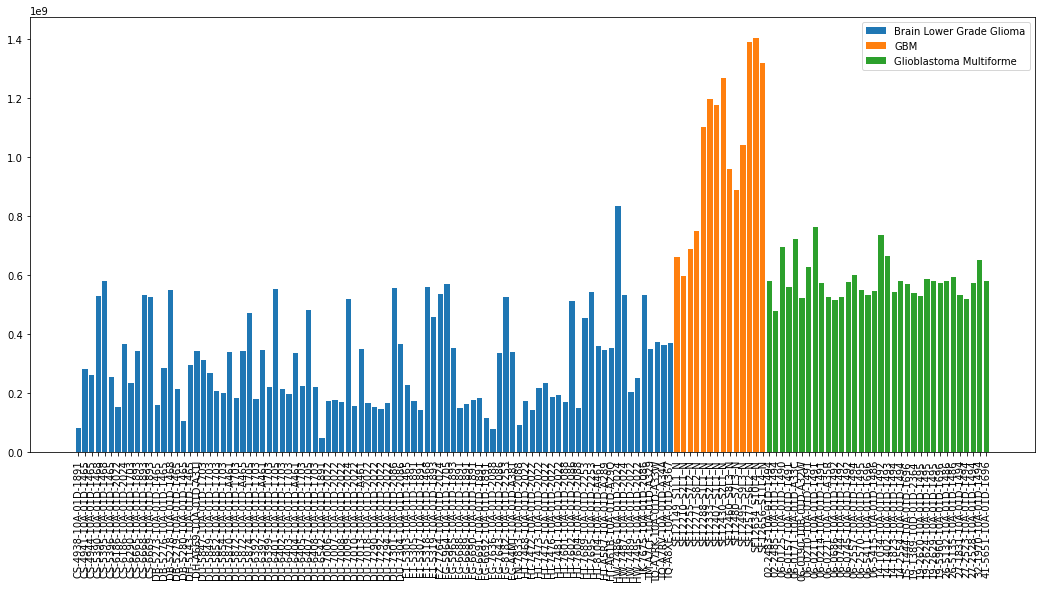

In [25]:
groups = counts.groupby('disease_type')
fig, ax = plt.subplots()
plt.xticks(rotation=90)
for name, group in groups:
    ax.bar(group['sample'],group['raw pair count'], label=name)
ax.legend()
plt.show()

---

In [26]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [27]:
pd.set_option('display.max_columns', default_max_columns)

In [28]:
pd.set_option('display.max_rows',default_max_rows)

In [29]:
pd.set_option('display.precision', default_precision)